# Homework 1

## P1 : MLE for uniform distribution

**1)** The scores of the 5 students in Prof. K's class who got A+ are :  [ 92, 95.8, 91.3, 94.1, 90.9 ]

The pdf of the uniform distribution is represented as: 

$$
p(x) = \left\{
    \begin{array}\\
        \frac{1}{b-a} & \mbox{if } \ a \leq x \leq b \\
        0 & \mbox{otherwise }
    \end{array}
\right.
$$

**2)** To find the maximum likelihood estimate for the parameters a and b of the uniform distribution :

We do know that n = 5 as there are 5 students who got A+. The MLE is given by :

#### $ argmax \prod_{i=1}^{n}p(x|a,b) $ &nbsp; &nbsp; => &nbsp; &nbsp; $ argmax \prod_{i=1}^{n=5}\frac{1}{b-a} $

Now taking log we get :

#### $log \prod_{i=1}^{n=5}\frac{1}{b-a} $  &nbsp; &nbsp; => &nbsp; &nbsp; $ log\frac{1}{(b-a)^n} $

= &nbsp; $ log((b-a)^{-n}) $  &nbsp; &nbsp; = &nbsp; &nbsp; $ -nlog(b-a) $

Now differentiating with respect to "a" we get :

### $ \frac{\partial(-nlog(b-a))}{\partial a} $  &nbsp; &nbsp; = &nbsp; &nbsp;  $\frac{-n.(-1)}{(b-a)} $  &nbsp; &nbsp; = &nbsp; &nbsp;  $\frac{n}{(b-a)}$


Now differentiating with respect to "b" we get :

### $ \frac{\partial(-nlog(b-a))}{\partial b} $  &nbsp; &nbsp; = &nbsp; &nbsp;  $\frac{-n.(1)}{(b-a)} $  &nbsp; &nbsp; = &nbsp; &nbsp;  $\frac{-n}{(b-a)}$


Here from the given information we know that n = 5 as there are scores of 5 students who got A+.

While taking the differentiation with respect to "a" we can see that "a" is monotonically increasing. Hence the value of "a" would be => min(92, 95.8, 91.3, 94.1, 90.9) which is 90.9.

$ \hat{a}_{MLE} = 90.9 $

While taking the differentiation with respect to "b" we can see that "b" is monotonically decreasing. Hence the value of "b" would be => max(92, 95.8, 91.3, 94.1, 90.9) which is 95.8.

$ \hat{b}_{MLE} = 95.8 $

**3)** Since Prof. K might have used an integer multiple of 5 rather than a real-valued boundary, considering this as a prior knowledge and looking into the data samples we could easily say that 90.9 (minimum score) and 95.8 (maximum score) should be included along with the prior knowledge in the A+ distribution. Now considering these prior knowledge along with the data sample we can conclude that the A+ students will be in the range of scores **between 90 to 100** where "a" being 90 and "b" being 100.

## P2: Central Limit Theorem

In [1]:
from PIL import Image
from numpy import *
import numpy as np
import random
from matplotlib import pyplot as plt




input_image = Image.open("data/luddy.jpg").convert('RGB')

image_array = np.array(input_image)

red_channel = image_array[:,:,0]

print(red_channel.shape)

(3655, 6496)


In [2]:
# Function to split the patches

def get_patch(row, col, n, m):
    
    matrix = []

    for i in range(row, red_channel.shape[0]):
        each_pos = []
        if(i < row+n):
            for j in range(col, red_channel.shape[1]):
                if(j < col+m):
                    each_pos.append(red_channel[i][j])

            matrix.append(each_pos)
            
    return matrix

In [3]:
# Function to define the patches

def patch_num(num, n, m):

    matrix = []
    
    row_list_2 = np.random.choice(range(0,red_channel.shape[0]-(n+1)),num,replace=True)
    col_list_2 = np.random.choice(range(0,red_channel.shape[1]-(m+1)),num,replace=True)


    index_2 = zip(row_list_2,col_list_2)

    for each_index in index_2:
        matrix.append(get_patch(each_index[0], each_index[1], n, m))

    num_mat = np.array(matrix)

    avg_matrix = np.sum(num_mat,axis=0) / num
    
    return avg_matrix


In [4]:
def stats(values):
    
    mean = np.mean(values)
    variance = np.var(values)
    
    return mean,variance

In [5]:
# The patch dimension

n = 100  # Row size of the patch
m = 100  # Column size of the patch

## 2 Patches

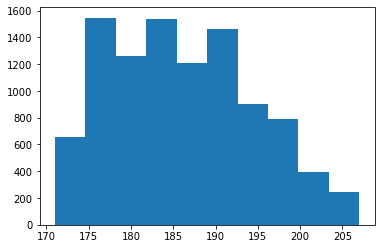

In [6]:
avg_matrix = patch_num(2, n, m)

hist_list = [value for each_list in avg_matrix for value in each_list]

plt.hist(hist_list)
plt.show()

mean_2, variance_2 = stats(hist_list)

## 100 Patches

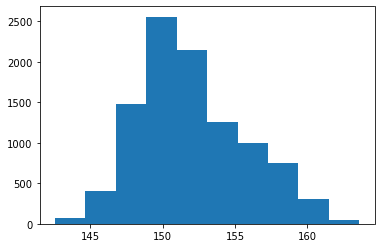

In [7]:
avg_matrix = patch_num(100, n, m)

hist_list = [value for each_list in avg_matrix for value in each_list]

plt.hist(hist_list)
plt.show()

mean_100, variance_100 = stats(hist_list)

## 1000 Patches

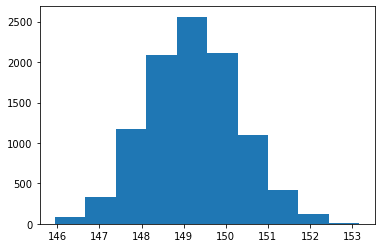

In [8]:
avg_matrix = patch_num(1000, n, m)

hist_list = [value for each_list in avg_matrix for value in each_list]

plt.hist(hist_list)
plt.show()

mean_1000, variance_1000 = stats(hist_list)

The Gaussian distribution is given by:


### $ P(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-1}{2}\left( \frac{x-\mu}{\sigma} \right)^2} $


Now taking the log likelihood we get :

### $ ln p(D|\mu,\sigma) = ln \prod_{i=1}^{n}p(x|\mu,\sigma) $

### $ = nln\frac{1}{\sqrt{2\pi}} + nln\frac{1}{\sigma} - \frac{\sum_{i=1}^{n} {(x-\mu)}^2}{2\sigma^2} $  


Here we know x which are the averaged patches, n is the 10000 pixel intensity and $\mu$ is the sample mean of each averaged patch and $\sigma$ is the variance of each averaged patch.



In [23]:
# Finding log likelihood of all the three averaged patches

def log_likelihood(n,x,mean,variance):
    
    term_1 = n*np.log(1/sqrt(2*np.pi))
    
    term_2 = n*np.log(1/variance)
    
    term_3a = sum([(each-mean)**2 for each in x])
    
    term_3b = 2*(variance)**2
    
    term_3 = term_3a/term_3b
    
    logLikelihood = term_1 + term_2 - term_3
    
    return logLikelihood

logLikelihood_2 = log_likelihood(10000, hist_list, mean_2, variance_2)

logLikelihood_100 = log_likelihood(10000, hist_list, mean_100, variance_100)

logLikelihood_1000 = log_likelihood(10000, hist_list, mean_1000, variance_1000)


print("Log likelihood of the averaged 2 patches :", logLikelihood_2)
print("Log likelihood of the averaged 100 patches :", logLikelihood_100)
print("Log likelihood of the averaged 1000 patches :", logLikelihood_1000)


Log likelihood of the averaged 2 patches : -52955.236436493746
Log likelihood of the averaged 100 patches : -35412.93436479649
Log likelihood of the averaged 1000 patches : -15120.325459393924


We can see from the log likelihood of the three average patches that, the log likelihood value increases with increase in the number of patches from which the average is calculated. Hence we can conclude from Central Limit Theorem that sampling more and more patches from the image will make the distribution of the sample mean to be normally distributed and thus increasing the level of Gaussanity. We can also see from the histogram that, the one with 1000 patches has the highest level of Gaussianity among the three and hence the log likelihood is also higher. 

# P3: Gradient Ascent for Eigendecomposition

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

mat = scipy.io.loadmat('data/X.mat')

print(mat['X'].shape)

(2, 1000)


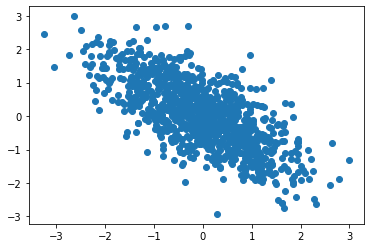

In [3]:
plt.scatter(mat['X'][0],mat['X'][1])

In [4]:
def gradient_ascent(w, X, rho):
    
    # Normalizing to make w as unit vector - Step 5
    #w_norm = w/np.linalg.norm(w)
    
    # Projecting data samples to the eigenvector - Step 6
    z = np.matmul(w.T, X)
    
    # We need to maximize this eigen value - Step 7
    lambda_1 = np.matmul(z,z.T) 
    
    # Converting the data to square matrix
    data_square = np.matmul(X, X.T)
    
    # Differentiating objective function with respect to the parameter - Step 8
    der_lambda = np.matmul(data_square, w) + np.matmul(data_square, w)
    
    # Using gradient direction to update the parameter
    new_w = w + rho*der_lambda
    
    #new_w = new_w/np.linalg.norm(new_w)
    new_w_norm = new_w/np.sqrt(np.sum(new_w**2))
    
    return new_w_norm    
    

## First Eigenvector

In [5]:
X = mat['X']

w = random.normal(size=2)

#w = w/np.linalg.norm(w)

w_norm = w/np.sqrt(np.sum(w**2))

rho = 0.001

count = 0

while(True):
    
    count+=1

    updated_w_1 = gradient_ascent(w_norm, X, rho)
    
    if(abs(sum(updated_w_1) - sum(w_norm)) < 0.000000000001):
        
        break
    
    w_norm = updated_w_1
    
print(" The first Eigen vector:", updated_w_1)
print("No. of Iteration for gradient convergence:", count)

 The first Eigen vector: [-0.70593278  0.70827884]
No. of Iteration for gradient convergence: 31


In [6]:
w_X = np.matmul(updated_w_1.T, X)

s = np.linalg.norm(w_X)

print(s)

u_T = w_X/s

40.72576985464108


In [7]:
u_T = u_T.reshape(1,1000)

w_s_1 = updated_w_1.reshape(2,1)

first_eigen = np.matmul((w_s_1*s),u_T)

print(first_eigen.shape)

(2, 1000)


In [8]:
new_X_1 = X - first_eigen

<ipython-input-9-15e6f2ca95da>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis = plt.axes()


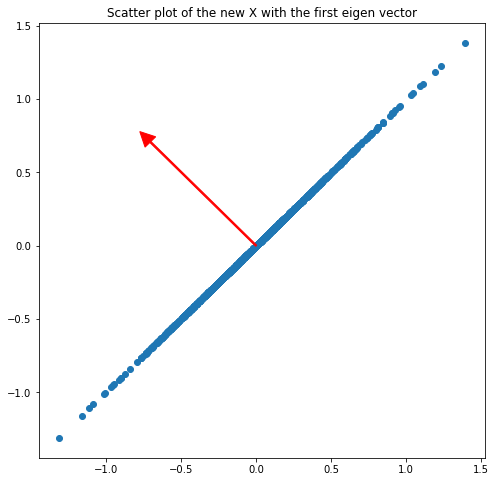

In [9]:
plt.figure(figsize = (8,8))
plt.scatter(new_X_1[0],new_X_1[1])

origin = [0,0]

axis = plt.axes()
axis.arrow(origin[0], origin[1], w_s_1.tolist()[0][0], w_s_1.tolist()[1][0], width = 0.01, color = 'red', head_width = 0.1, head_length = 0.1)
plt.title('Scatter plot of the new X with the first eigen vector')
plt.show()

We can see from the above plot that the new data matrix doesnt have any effect of the first eigen vector.

## Second Eigenvector

In [10]:
X = new_X_1

w = random.normal(size=2)

w_norm = w/np.sqrt(np.sum(w**2))

rho = 0.001

count = 0

while(True):
    
    count+=1

    updated_w_2 = gradient_ascent(w_norm, X, rho)
    
    if(abs(sum(updated_w_2) - sum(w_norm)) < 0.000000000001):
        
        break
    
    w_norm = updated_w_2
    
print("The second Eigen vector:", updated_w_2)
print("No. of Iteration for gradient convergence:", count)

The second Eigen vector: [0.70827884 0.70593278]
No. of Iteration for gradient convergence: 43


In [11]:
w_X = np.matmul(updated_w_2.T, X)

s = np.linalg.norm(w_X)

print(s)

u_T = w_X/s

17.040911224747


In [12]:
u_T = u_T.reshape(1,1000)

w_s_2 = updated_w_2.reshape(2,1)

second_eigen = np.matmul((w_s_2*s),u_T)

print(second_eigen.shape)

(2, 1000)


In [13]:
new_X_2 = X - second_eigen

<ipython-input-14-5593dd3b5c31>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axis = plt.axes()


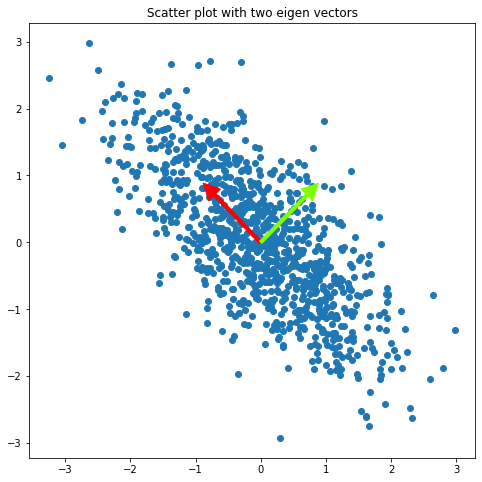

In [14]:
plt.figure(figsize = (8,8))
plt.scatter(mat['X'][0],mat['X'][1])

origin = [0,0]

axis = plt.axes()
axis.arrow(origin[0], origin[1], w_s_1.tolist()[0][0], w_s_1.tolist()[1][0], width = 0.05, color = 'red', head_width = 0.25, head_length = 0.25)
axis.arrow(origin[0], origin[1], w_s_2.tolist()[0][0], w_s_2.tolist()[1][0], width = 0.05, color = 'chartreuse', head_width = 0.25, head_length = 0.25)
plt.title('Scatter plot with two eigen vectors')
plt.show()